# Math for ML: Calculus

In Part 3 of this series on Math for ML, I'll cover the basics of calculus, both in the univariate and multivariate cases.

Calculus is essentially the study of the continuum. Important things that calculus seeks to understand are:
- Infinitesimals: How to manipulate numbers that are "infinitely" small.
- Limits: What happens when numbers get arbitrarily close to each other.
- Differentiation: How one variable changes continuously in response to one or more other variables. 
- Integration: How to add up infinitely many small numbers to get a finite number.

Not all of these topics are equally important to know for machine learning, but I'll try to at least touch on each topic a little bit. Let's get started.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.math_ml import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Infinitesimals

Fundamental to the understanding of calculus is the idea of an "infinitely small" number, called an infinitesimal. An **infinitesimal** is a number that's not 0 but so close to being 0 that you can't really tell it isn't 0. These small numbers are often written in math with letters like $\varepsilon$ or $\delta$. Think of them as *very very* tiny numbers, so tiny their square is basically 0:
$$\varepsilon > 0, \quad \varepsilon^2 \approx 0.$$

But what does this even mean? Here it might be helpful to recall our discussion of floating point numbers. Recall that we can't get infinite precision. In python's double precision floating point we can only get down to about $5 \cdot 10^{-324}$, or `5e-324`. If the square of a small number has a value *smaller* than about `5e-324` we'd literally get `0.0` as far as python is concerned.

Just for fun let's look at the really tiny number $10^{-300}$, or `1e-300`. That's 300 decimal places of zeros before the 1 even shows up. Python thinks `1e-300` is just fine. But what happens if we square it? We should in theory get $10^{-600}$, or 600 decimal places of zeros followed by a 1. But as far as floating point is concerned, the square is zero.

In [3]:
epsilon = np.float64(1e-300)
epsilon, epsilon ** 2

(1e-300, 0.0)

Of course, you could argue that we could just go to a higher precision then. Use more bits. But eventually, if we keep making $\varepsilon$ small enough we'll hit a point where $\varepsilon^2 = 0$. Thus, if it makes you feel better, when you see an infinitesimal just think "$10^{-300}$ in double precision".

**Aside:** If you want to be *really* pedantic, you might say that it shouldn't matter what a computer does, since any positive number $\varepsilon$ squared must still be greater than zero, no matter how small $\varepsilon$ is. This is true for *real numbers* $\mathbb{R}$. But it turns out infinitesimals aren't real numbers at all. They lie in an extension of the real number line called the **hyperreal numbers**, denoted $\mathbb{R}^*$. In my opinion, this isn't an important thing to worry about in applied calculus.

Similar to infinitesimals being numbers that can be really, really small, we can also talk about numbers being really, really big. These are called **infinitely large** numbers. In analogy to infinitesimals, infinitely large numbers are positive numbers $N$ whose square is basically infinite,
$$N > 0, \quad N^2 \approx \infty.$$
We can get infinitely large numbers by inverting infinitesimals, and vice versa,
$$N = \frac{1}{\varepsilon}, \quad \varepsilon = \frac{1}{N}.$$
If $10^{-300}$ is a good rule of thumb for an infinitesimal, then $10^{300}$ is a good rule of thumb for an infinitely large number.

In [4]:
N = np.float64(1e300)
N, N ** 2

(1e+300, inf)

Infinitesimals are especially interesting when added to regular numbers. These are called **first order perturbations**. For example, consider some finite number $x$. It could be 2 or -100 or whatever you want. Suppose now we add to it an infinitesimal number $\varepsilon$. Suppose $y=f(x)=x^2$ is a function. What happens to $y$ if we perturb $x$ to $x+\varepsilon$? That is, what is $f(x + \varepsilon)$? Expanding the square, we have
$$f(x + \varepsilon) = (x + \varepsilon)^2 = x^2 + 2x\varepsilon + \varepsilon^2.$$
But since $\varepsilon^2 \approx 0$,
$$f(x + \varepsilon) = (x + \varepsilon)^2 \approx x^2 + 2x\varepsilon.$$

Okay, but what does this mean? Well, I can reformulate the question as follows: "If I change $x$ by a little bit, how much does the function $y$ change"? If $x$ is nudged to a nearby point $x+\varepsilon$, then $y$ necessarily gets nudged to $f(x + \varepsilon)=(x+\varepsilon)^2$. 

So how much does $y$ change? Call this change $\delta(x)$. Then we'd just have
$$\delta(x) = (x+\varepsilon)^2 - x^2 \approx 2x\varepsilon.$$
That is, if we change $x$ by a small amount $\varepsilon$, then $y$ itself changes by a small amount $\delta(x)=2x\varepsilon$. Interestingly, how much $y$ changes actually depends on which $x$ we pick. If $x=1$ then $y$ changes by $2\varepsilon$, just twice how much $x$ is nudged. If $x=1000$ though, then $y$ changes by $2000\varepsilon$, a much bigger change.

### Limits

Suppose we have some function $y=f(x)$. We'd like to look at the nearby behavior of the function around some point $x_0$. What we can do is consider some first order perturbation $x = x_0+\varepsilon$ and ask what $f(x_0+\varepsilon)$ is doing. Imagine making $\varepsilon$ smaller and smaller until it's infinitesimal. If $y=f(x_0+\varepsilon)$ gets closer and closer to some value $L$, we call $L$ the **limit** as $x$ approaches $x_0$, and write

$$L = \lim_{x \rightarrow x_0} f(x).$$

Another way to write the limit is to say $y \rightarrow L$ as $x \rightarrow x_0$. More formally, we say $L$ is the limit of as $x$ approaches $x_0$ if the difference $|f(x_0+\varepsilon)-L|$ is infinitesimal whenever $\varepsilon$ is infinitesimal.

This seems kind of pedantic if you think about it. It seems like we're just doing a bunch of extra work just to evaluate the function at $x_0$ to finally get $L=f(x_0)$? In most cases in practice this is true, but not *always*. 

A classic example is a function with a hole in it. Suppose we have a function $y=f(x)$ like this

$$
y = 
\begin{cases}
1 & x = 0, \\
x^2 & x \neq 0.
\end{cases}
$$

It's just a parabola $y=x^2$, but with a hole at $x=0$ since $f(0)=1\neq 0^2$. 

Suppose we make a first order perturbation to this function about $x=0$. Then since $\varepsilon \neq 0$,
$$f(0+\varepsilon) = (0 + \varepsilon)^2 = \varepsilon^2.$$
When $\varepsilon$ is infinitesimal, $\varepsilon^2=0$ by definition. That is,
$$\lim_{x \rightarrow 0} f(x) = 0 \neq f(0) = 1.$$

This is just a long drawn-out way of saying that the limit is what the function *would* be if it didn't have a hole in it at $x_0$. If the above function didn't have a hole in it, then $f(0)$ would be $0$, the limit I just derived.

In my experience, knowledge of limits isn't all that important for machine learning, so I won't dwell on this topic much more. I'll just mention that the most common limit we're interested in in practice is when $x_0=\infty$. That is, what is the function $f(x)$ doing as $x$ goes to $\infty$,
$$\lim_{x \rightarrow \infty} f(x).$$
I'll talk about these infinite limits in more depth when I get to complexity theory in a future lesson.

## Differentiation

### Differentials and Derivatives

Let's go back to our example before where we looked at first order perturbations to the function $y=x^2$. We showed if $x$ is infinitesimally changed to $x + \varepsilon$, then $y$ is changed to $y + \delta(x) \approx 2x\varepsilon$.

When we talk about changing $x$ by a little bit and asking how $y$ changes we use a cleaner notation. Instead of writing $x + \varepsilon$, we'd write $x + dx$. Instead of writing $y + \delta(x)$, we'd write $y + dy$. These values $dx$ and $dy$ are called **differentials**.

They're just infinitesimals like I defined them before, but this differential notation makes it clear what is a small change of what. Writing $dx$ means "a little bit of $x$". Writing $dy$ means "a little bit of $y$". This is where the term "differentiation" comes from.

In the language of differentials, we want to ask what happens to $y+dy$ in response to perturbations $x+dx$. In our running example, this is

$$y + dy = f(x+dx) = (x + dx)^2 = x^2 + 2xdx + dx^2 \approx x^2 + 2xdx,$$

with the approximate equality becoming exact when $dx$ is infinitesimal.

Let's solve for $dy$, how much $y$ changes in response to $x$ changing a little bit. Subtracting both sides by $y=x^2$ just gives $dy = 2xdx$. If we then divide both sides by $dx$ we get
$$\frac{dy}{dx} = 2x.$$

This ratio of differentials $\frac{dy}{dx}$ is called the **derivative** of the function $y=x^2$, usually just pronounced "dydx". The act of taking a derivative is called **differentiation**. Notice there's no infinitesimal ($dy$ or $dx$) on the right-hand side, hence the derivative is not itself an infinitesimal. It's finite.

Notice that the derivative is a *function* since it maps inputs $x$ to outputs $\frac{dy}{dx}=2x$. To indicate this functional relationship people sometimes write either 

$$\frac{dy}{dx}=\frac{d}{dx}f(x) \quad \text{ or } \quad \frac{dy}{dx}=f'(x)$$ 
to make this clear.

Let's use python to try to calculate what the derivative of $y=x^2$ is for a specific value of $x$, say $x=1$. We can do this by taking smaller and smaller values of $dx$ and looking at the ratio
$$\frac{dy}{dx}\bigg|_{x=1} = \frac{(x+dx)^2 - x^2}{dx}$$
for different choices of $dx$. 

**Notation:** Read the left-hand side of this expression as "the derivative evaluated at $x=1$". Another way to write the same thing is $f'(1)$ or $\frac{d}{dx}f(1)$.

I'll define a loop over some values of $dx$ and see what the predicted derivative is. Since the exact derivative function is $2x$, the exact answer at $x=1$ should be
$$\frac{dy}{dx}\bigg|_{x=1} = 2 \cdot 1 = 2.$$ 

I'll also print out the error, which is the predicted value $2$ minus the calculated value. Smaller error is better, obviously.

In [5]:
f = lambda x: x ** 2 # the function we want to differentiate
x0 = 1 # the value of x to calculate the derivative at
dydx_exact = 2 * x0 # the exact value of the derivative
for dx in [1, 0.1, 0.01, 0.001, 1e-4, 1e-5, 1e-10, 1e-100, 1e-200]:
    dydx = (f(x0 + dx) - f(x0)) / dx
    error = dydx - dydx_exact
    print(f'dx = {dx:8.16f} \t dy/dx = {dydx:4f} \t error = {error:4f}')

dx = 1.0000000000000000 	 dy/dx = 3.000000 	 error = 1.000000
dx = 0.1000000000000000 	 dy/dx = 2.100000 	 error = 0.100000
dx = 0.0100000000000000 	 dy/dx = 2.010000 	 error = 0.010000
dx = 0.0010000000000000 	 dy/dx = 2.001000 	 error = 0.001000
dx = 0.0001000000000000 	 dy/dx = 2.000100 	 error = 0.000100
dx = 0.0000100000000000 	 dy/dx = 2.000010 	 error = 0.000010
dx = 0.0000000001000000 	 dy/dx = 2.000000 	 error = 0.000000
dx = 0.0000000000000000 	 dy/dx = 0.000000 	 error = -2.000000
dx = 0.0000000000000000 	 dy/dx = 0.000000 	 error = -2.000000


Starting with $dx=1$ is a bad choice with a huge error of $1.0$. We're way off. Shrinking to $dx=0.1$ puts us in the ball park with a value $\frac{dy}{dx}=2.1$. You can see that making $dx$ successively smaller and smaller makes the error successively smaller, in this case by a factor of 10 each time. 

The error is getting smaller all the way down to about $dx=10^{-10}$ before creeping up again as we make $dx$ even smaller than that. This is due to the numerical roundoff of floating point numbers. We're subtracting two numbers $f(x_0+dx) - f(x_0) = (1+dx)^2 - 1$ that are very close to each other when $dx$ is really small, which as you'll recall is one of the pitfalls to avoid when working with floating point numbers.

This method we just used to calculate the derivative is essentially exactly how derivatives are usually calculated on a computer. The process of calculating the derivative this way, directly from its definition essentially, is called **numerical differentiation**. We choose a small value of $dx$ and just apply the formula above, with some minor tweaks to get better accuracy in fewer steps. It's common in practice to choose "less small" values for $dx$ when calculating derivatives numerically like this, e.g. `1e-5`.

We can talk about any reasonably well-behaved function $f(x)$ having a derivative. If $y=f(x)$ and we make a first order perturbation $x+dx$, then $y$ gets perturbed by $y+dy=f(x+dx)$. The amount $y=f(x)$ changes *per amount* $dx$ is then the **derivative**

$$\frac{dy}{dx} = \frac{f(x+dx)-f(x)}{dx}.$$

This definition is only exact when $dx$ is infinitesimal. For finite values of $dx$ (like what we'd code up on a computer) this equality is only approximately true.

What do I mean when I say the function $f(x)$ needs to be reasonably well behaved? For one thing, the function needs to be **continuous**. Informally, you can think of a univariate function as being continuous if you can draw its curve on a piece of paper without lifting your pen. There are no jumps or holes anywhere in the functions' curve. More formally, a function is continuous at $x_0$ if $f(x) \rightarrow f(x_0)$ as $x \rightarrow x_0$.

Continuity is just *one* condition necessary for $f(x)$ to be differentiable. It also can't be too jagged in some sense. Derivatives don't make sense at points where there are kinks in the function curve. At points where there are kinks we have to use a slightly different kind of derivative called a [subderivative](https://en.wikipedia.org/wiki/Subderivative).

Since derivatives are functions we can take the derivative of the derivative too, $\frac{d}{dx} \frac{dy}{dx}$, which turns out to be

$$\frac{d^2 y}{dx^2} = \frac{d}{dx} \frac{dy}{dx} = \frac{d}{dx} \frac{f(x+dx)-f(x)}{dx} = \frac{f(x+2dx) - 2f(x+dx) + f(x)}{dx^2}.$$

This is called a **second derivative**, and sometimes also written $f'(x)$ or $\frac{d^2}{dx^2} f(x)$.

As a quick example, the second derivative of our running function $y=x^2$ is the first derivative of $2x$, which is

$$\frac{d^2 y}{dx^2} = \frac{2(x + dx) - 2x}{dx} = 2.$$

Higher-order derivatives can be defined as well by continuing to take derivatives of the second derivative, like third derivatives of fourth derivatives. These show up less prominently though, and as such aren't discussed all that much.

### Derivatives As Slopes

The first derivative $\frac{dy}{dx}$ has an interesting and useful geometric interpretation as the **slope** of the curve $y=f(x)$ at the point $x$. To see this, imagine a right triangle with length $dx$ and height $dy$. The slope, or "steepness", of its hypotenuse is just the ratio height over width, i.e. $\frac{dy}{dx}$.

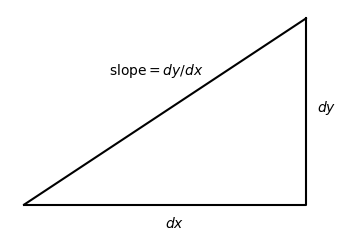

In [6]:
plot_right_triangle()

We can use this idea to talk about the slope of a function at a point. If $y=f(x)$ is a function, then the derivative $\frac{dy}{dx}$ at some point $x=x_0$ is the slope of that function at the point $(x_0,y_0)$. It's the slope of the line that hugs the point $(x_0,y_0)$ *tangent* to the curve. This "hugging line" is called the **tangent line**. We can pretty easily solve for what this line has to be. It must run through $(x_0,y_0)$ and have slope $m=\frac{d}{dx}f(x_0)$, so writing $y=mx+b$ and solving for the intercept $b$ would give

$$y = y_0 + \frac{d}{dx}f(x_0)(x - x_0).$$

Here's an example. I'll plot the function $y=x^2$ and its *tangent* at a point $x_0=2$ on the x-axis. The corresponding $y$ at $x=2$ is just $y_0=x_0^2=4$. As we derived above, its derivative (and hence slope) at $x_0=2$ is
$$\frac{d}{dx}f(2)=2(2)=4,$$
so the equation for the tangent line of $y=x^2$ at $x_0=2$ is
$$y = 4 + 4(x - 2) = 4x -4.$$

The code below implements this calculation. I'll define the function `f` that gives `y = f(x)` along with the derivative `dydx = dfdx(x)`, and then use these two define a function `f_tangent` to calculate the tangent line, which also depends on a specified point `x0`.

Feel free to adjust the value of `x0` observe how the slope changes with the value you pick. In all cases, the line should hug the curve of the function and stay tangent to it.

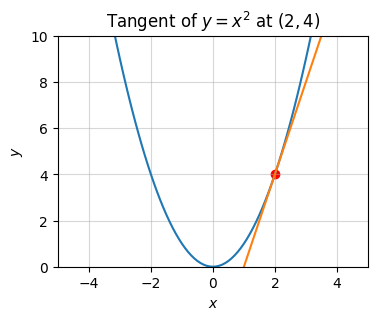

In [7]:
f = lambda x: x ** 2
dfdx = lambda x: 2 * x

x0 = 2
y0 = f(x0)
x = np.arange(-3 * x0, 3 * x0, 0.1)

f_tangent = lambda x: y0 + dfdx(x0) * (x - x0)
plot_tangent_line(x, x0, f, f_tangent, xlim=(-5, 5), ylim=(0, 10), title=f'Tangent of $y=x^2$ at ${(x0,y0)}$')

Generally speaking, if the derivative $\frac{dy}{dx}$ at a point is *positive* the tangent line will slant towards the *right*. If the derivative at that point is *negative* the tangent line will slant towards the *left*. If it's zero, the tangent line there will be horizontal.

The second derivative $\frac{d^2 y}{dx^2}$ has a geometric interpretation as well, but it's harder to visualize. It captures information about the *curvature* of the function, i.e. how much a function bends at each point. If a given function is really step at a point its second derivative will be high. If it's really flat at a point its second derivative will be small. 

The sign of the second derivative at a point will indicate whether the function is curved upward or downward. If it's positive the function will be curved upward, if negative it'll curve downward. In our example, since $\frac{d^2 y}{dx^2} = 2 > 0$, the function curves upward for *every* point $x$. Such a function is called a **convex function**.

### Differentiation Rules

As we've seen, derivatives are functions, $\frac{dy}{dx} = \frac{d}{dx}f(x)$. For this reason, several rules exist relating derivatives to their original functions. 

Note that for most people doing machine learning it's not really that important to know all of these rules. However, if you're more into research or just mathematically inclined it may interest you to be more familiar with them.

Here are the derivatives of some common functions that come up:

<table width="20%">
  <tr>
    <th style="text-align: center">Common Derivatives</th>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}1 = \frac{d}{dx}0 = 0$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}x = 1$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}x^2 = 2x$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}\sqrt{x} = \frac{1}{2\sqrt{x}}$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}\frac{1}{x} = -\frac{1}{x^2}$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}e^x = e^x$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}\log{x} = \frac{1}{x}$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}\sin{x} = \cos{x}$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}\cos{x} = -\sin{x}$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}\sigma(x) = \sigma(x)\big(1-\sigma(x)\big)$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\frac{d}{dx}\tanh(x) = \big(1 - \tanh^2(x)\big)$</td>
  </tr>
</table>

Here are some more general derivative rules you can use to differentiate more arbitrary functions:
<table width="100%">
  <tr>
    <th style="width: 20ch; text-align: left">Name</th>
    <th style="width: 50ch; text-align: left">Rule</th>
    <th style="width: 50ch; text-align: left">Example</th>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;"></td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}(c) = 0$ for any constant $c$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}(10) = 0$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Power Rule</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}x^n = nx^{n-1}$ for any $n \neq 0$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}x^3 = 3x^2$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Addition Rule</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}(f(x) + g(x)) = \frac{d}{dx}f(x) + \frac{d}{dx}g(x)$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}(x^2 + \log x) = \frac{d}{dx}x^2 + \frac{d}{dx}\log x = 2x + \frac{1}{x}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Constant Rule</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}cf(x) = c \frac{d}{dx}f(x)$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}2 \sin x = 2 \frac{d}{dx}\sin x = 2 \cos x$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Product Rule</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}(f(x)g(x))=g(x)\frac{d}{dx}f(x) + f(x)\frac{d}{dx}g(x)$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}(x e^x) = x \frac{d}{dx}e^x + e^x \frac{d}{dx} x = xe^x + e^x$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Quotient Rule</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}\bigg(\frac{f(x)}{g(x)}\bigg) = \frac{g(x)\frac{d}{dx}f(x)-f(x)\frac{d}{dx}g(x)}{g^2(x)}$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx} \frac{\cos x}{x^2} = \frac{x^2\frac{d}{dx}\cos x-\cos x\frac{d}{dx}x^2}{(x^2)^2} = \frac{-x^2 \sin x - 2x \cos x}{x^4}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Chain Rule</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx}f(g(x)) = \frac{d}{dy}f(y)\frac{d}{dx}g(x) = \frac{dz}{dy}\frac{dy}{dx}$</td>
    <td style="width: 50ch; text-align: left;">$\frac{d}{dx} e^{\sin x} = \frac{d}{dy} e^y \frac{d}{dx}\sin x = e^{\sin x} \cos x$</td>
  </tr>
</table>

**Aside:** We can pretty easily derive these rules using infinitesimals. For example, here's a derivation of the all important work-horse of deep learning, the chain rule. Suppose we have a composite function given by $z=f(y)$ and $y=g(x)$, or equivalently $z=f(g(x))$. Let $dx,dy,dz$ be infinitesimals. By definition, the derivative of $z=f(y)$ is
$$\frac{dz}{dy} = \frac{f(y+dy)-f(y)}{dy}.$$
Now, notice since $dz = f(y + dy) - f(y)$, we have
$$dz = \frac{dz}{dy}dy.$$
By a similar argument, since $y=g(x)$ and $dy = g(x+dx) - g(x)$, we have
$$dy = \frac{dy}{dx}dx.$$
Putting these two together and then dividing both sides by $dx$ gives the chain rule we seek,
$$\frac{dz}{dx} = \frac{dz}{dy}\frac{dy}{dx}. \square$$

### WolframAlpha [Optional]

While python has a library called [SymPy](https://www.sympy.org/en/index.html) that can calculate derivatives and other math symbolically, my favorite tool for symbolic math is [WolframAlpha](https://www.wolframalpha.com/). In WolframAlpha you can just type what you want to take the derivative of in more or less natural language and it'll usually figure out what you mean and instantly give you the right answer. 

Most of the time it's usually easier to just go to their website and type your query in the search bar there. Since I want to keep everything inside this notebook though I'll use their API to show a couple of examples. Note that WolframAlpha can do *far* more than just calculate derivatives. See their documentation for more info.

Here are the derivatives of a couple of functions I typed in.

In [8]:
query_wolfram_alpha('d/dx e^x + x^2 - log(x)')

['d/dx(e^x + x^2 - log(x)) = 2 x + e^x - 1/x']

In [9]:
query_wolfram_alpha('d/dx (x^5 - 5*sin(x)) / (e^x + log(x))')

['d/dx((x^5 - 5 sin(x))/(e^x + log(x))) = (5 (e^x + log(x)) (x^4 - cos(x)) - (e^x + 1/x) (x^5 - 5 sin(x)))/(e^x + log(x))^2']

You can also use WolframAlpha to solve equations and even evaluate limits.

In [10]:
query_wolfram_alpha('solve x^2 - 1 = 5')

['x = ± sqrt(6)']

In [11]:
query_wolfram_alpha('limit of y=x^2 at x=1')

['lim_(x->1) x^2 = 1']

If you want to play with WolframAlpha it's probably easier to just go to their webpage via the above link. If you want to run these queries in the notebook like I did, you'll need to create an account and register for a free API key [here](https://products.wolframalpha.com/api). You'll also need to `pip install wolframalpha` in your environment and be connected to the internet when you make your queries.

## Multivariate Differentiation

Just as we can differentiate *univariate* functions like $y=f(x)$, we can also differentiate *multivariate* functions like $z=f(x,y)$. The main difference is that we can take derivatives of many inputs variables, not just one.

### The Gradient

Suppose $z=f(x,y)$ and we want to ask the question, how does $z$ change if we change $x$ by an infinitesimal amount $dx$, holding $y$ constant? Evidently it would be $z + dz = f(x+dx, y)$. If we pretend $y$ is constant, this would mean

$$dz = f(x+dx, y) - f(x, y).$$

Dividing both sides by $dx$ we'd get *something* like a derivative. But it's not *the* derivative since we're only changing $x$ and fixing $y$. For this reason it's called the **partial derivative** of $z$ with respect to $x$, and typically written with funny $\partial$ symbols instead of $d$ symbols,

$$\frac{\partial z}{\partial x} = \frac{f(x+dx, y) - f(x, y)}{dx}.$$

Similarly, we can ask the dual question, how does $z$ change if we change $y$ by an infinitesimal amount $dy$, holding $x$ constant? By the same logic, we'd get

$$dz = f(x, y + dy) - f(x, y),$$

and dividing by $dy$ would give the partial derivative of $z$ with respect to $y$,

$$\frac{\partial z}{\partial y} = \frac{f(x, y + dy) - f(x, y)}{dy}.$$

But these don't tell us everything. We want to know how $z$ changes if we change $x$ and $y$ arbitrarily, not if we hold one of them constant. That is, we want the full $dz$. In the case when $y=f(x)$, we saw that $dy=\frac{dy}{dx}dx$. If we only change $x$, evidently $dz = \frac{\partial z}{\partial x} dx$. Similarly if we only change $y$, then $dz = \frac{\partial z}{\partial y} dy$. It seems like if we want to change *both*, we should add these two effects together,

$$dz = \frac{\partial z}{\partial x} dx + \frac{\partial z}{\partial y} dy.$$

This equation is called the multivariate **chain rule**. Since it depends on changes in both $x$ and $y$, $dz$ is called the **total differential**. The chain rule tells us everything we need to know about how $z$ changes when either $x$ or $y$ are perturbed by some small amount. The amount that $z$ gets perturbed is $dz$.

If we have a composite function like, say, $z=f(x,y)$, $x=g(u, v)$, $y=h(u, v)$, we can do just like in the univariate chain rule and divide the total differential by $du$ or $dv$ to get the chain rule in partial derivative form,

$$\frac{\partial z}{\partial u} = \frac{\partial z}{\partial x}\frac{\partial x}{\partial u} + \frac{\partial z}{\partial y}\frac{\partial y}{\partial u},$$
$$\frac{\partial z}{\partial v} = \frac{\partial z}{\partial x}\frac{\partial x}{\partial v} + \frac{\partial z}{\partial y}\frac{\partial y}{\partial v}.$$

This is the form in which the multivariate chain rule usually appears in deep learning, but with many more variables.

It's interesting to write this formula as a dot product of two vectors. If we define two vectors as follows,

$$
\frac{dz}{d\mathbf{x}}=\big(\frac{\partial z}{\partial x}, \frac{\partial z}{\partial y}\big), \\
d\mathbf{x} = (dx, dy),
$$

then the chain rule would say

$$dz = \frac{dz}{d\mathbf{x}} \cdot d\mathbf{x}.$$

This looks just like the equation for the ordinary derivative, $dy=\frac{dy}{dx}dx$,except there's a dot product of vectors here.

The vector $\frac{dz}{d\mathbf{x}}$ looks like the ordinary derivative, but it's now a vector of partial derivatives. It's called the **gradient** of $z=f(x,y)$, also often written $\nabla f(x,y)$.

Let's do an example. Consider the function $z=x^2+y^2$. This function has a surface that looks like a bowl.

In [12]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
f = lambda x, y: x**2 + y**2

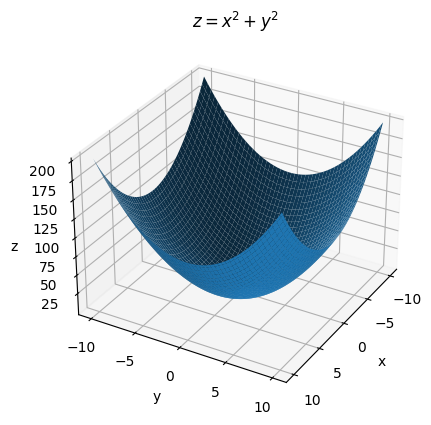

In [13]:
plot_3d(x, y, f, title='$z=x^2+y^2$')

Suppose we treat $y$ as constant, say $y=2$. If we nudge $x$ to $x+dx$, then $z$ would get nudged to

$$z+dz = f(x+dx,y) = (x+dx)^2 + y^2 = (x^2 + 2xdx + dx^2) + y^2 \approx z + 2xdx.$$

That is,
$$\frac{\partial z}{\partial x} = 2x.$$

This is exactly what we got before in the 1D case with $f(x)=x^2$. This makes since. By treating $y$ as constant we're effectively pretending it's not there in the calculation, which makes it act like we're taking the 1D derivative $z=x^2$.

Since $z=x^2+y^2$ is symmetric in $x$ and $y$, the exact same argument above would show

$$\frac{\partial z}{\partial y} = 2y.$$

The gradient vector would thus be
$$\frac{dz}{d\mathbf{x}} = (2x, 2y) = 2\mathbf{x}, \quad \text{where }\mathbf{x} = (x,y).$$

The gradient looks exactly like the 1D version where $y=x^2$ and $\frac{dy}{dx}=2x$, except there's a vector $\mathbf{x}$ instead. 

Just as with the ordinary derivative, we can see that the gradient is a function of its inputs. The difference though is the gradient is a **vector-valued function**. Its output is a vector, not a scalar. To indicate it's a vector-valued derivative, one sometimes might write $\frac{d}{d\mathbf{x}}f(\mathbf{x})$, or $\mathbf{f}'(\mathbf{x})$ where the $\mathbf{f}'$ is bolded.

Numerical differentiation extends naturally to the multivariate case as well. We can calculate partial derivatives numerically straight from their definitions, using reasonably small values like $dx=dy=10^{-5}$. To get the gradient, just calculate the partials numerically and put them into an array. 

Here's an example. I'll calculate the partials $\frac{\partial z}{\partial x}, \frac{\partial z}{\partial y}$ at the point $x_0=1, y_0=1$. The partials are given by `dzdx` and `dzdy` respectively, and the gradient vector by `grad`. Notice the error is again on the order of $dx$ and $dy$, hence we get good agreement with the above equation when $x_0=1, y_0=1$.

In [14]:
x0 = y0 = 1
dx = dy = 1e-5

dzdx = (f(x0 + dx, y0) - f(x0, y0)) / dx
dzdy = (f(x0, y0 + dy) - f(x0, y0)) / dy

grad = [dzdx, dzdy]
grad

[2.00001000001393, 2.00001000001393]

### Tangent Planes

In the case of the ordinary univariate derivative $\frac{dy}{dx}$, we could think of it geometrically as the slope of the tangent line to $y=f(x)$ at a point $(x_0,y_0)$. We can do something similar for the gradient $\frac{dz}{d\mathbf{x}}$ by thinking of it as the vector of slopes defining a tangent plane to $z=f(\mathbf{x})$ at a point $(\mathbf{x}_0, z_0)$.

Suppose $z=f(x,y)$. Let $(x_0,y_0,z_0) \in \mathbb{R}^3$ be a point in 3D space, with $z_0=f(x_0,y_0)$. This is just a point on the 2D surface of $z=f(x,y)$. Now, it doesn't make much sense to talk about a single *line* that hugs this point, since there can now be infinitely many lines that hug that point. What we instead want to do is think about a *plane* that hugs the surface. This will be called the **tangent plane**. I won't derive it, but its function turns out to be

$$z = z_0 + \frac{\partial}{\partial x}f(x_0,y_0) (x - x_0) + \frac{\partial}{\partial y}f(x_0,y_0) (y - y_0),$$

or in vector notation,
$$z = z_0 + \frac{d}{d\mathbf{x}} f(\mathbf{x}_0) \cdot (\mathbf{x} - \mathbf{x}_0).$$

This tangent plane will hug the surface of the function at the point $(x_0,y_0,z_0)$.

Here's an example, where I'll calculate the tangent plane to $z=x^2+y^2$ at the point $(1,1)$. Since I showed above that the gradient in this case is $(2x, 2y)$, the tangent line becomes $z=2 + 2(x-1) + 2(y-1)$. Everything is done in an analogous way to the tangent line calculation from before.

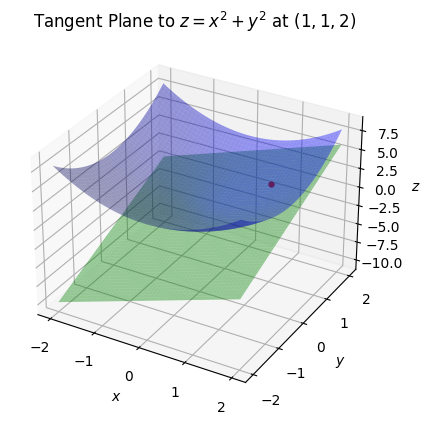

In [15]:
f = lambda x, y: x**2 + y**2
dfdx = lambda x, y: (2 * x, 2 * y)

x0 = y0 = 1
z0 = f(x0, y0)

x = np.linspace(-2 * x0, 2 * x0, 100)
y = np.linspace(-2 * y0, 2 * y0, 100)

f_tangent = lambda x, y: 2 * (x - x0) + 2 * (y - y0) + 2
plot_tangent_plane(x, y, x0, y0, f, f_tangent, title=f'Tangent Plane to $z=x^2+y^2$ at ${(x0, y0, z0)}$')

If you look at the plane, the partial of $z$ with respect to $x$ turns out to represent the slope of the line running along the plane *parallel* to the x-axis at the point $(1,1)$. Similarly, the partial of $z$ with respect to $y$ represents the slope of the line running along the plane parallel to the y-axis at the point $(1,1)$. The gradient vector is both of these things together, which gives a vector $(2, 2)$ that points in the steepest direction up the surface from the point $(1,1)$. Said differently, the gradient vector is the direction of *steepest ascent*.

This fact can be visualized easier by looking at the contour plot. In the contour plot, the tangent plane will appear as a line hugging tangent to the contour at the point $(1,1)$. The gradient vector will always point outward *perpendicular* to this line in the direction of steepest ascent of the function. 

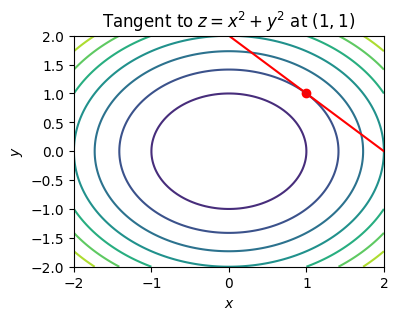

In [16]:
plot_tangent_contour(x, y, x0, y0, f, f_tangent, dfdx, title=f'Tangent to $z=x^2+y^2$ at ${(x0, y0)}$')

Here's an argument for why this is true. A contour is *by definition* a curve where $z$ is constant. Imagine taking the surface of $z=f(x,y)$ and at each $z$ value slicing the surface parallel to the xy-plane. That's all a contour is. This means that along any given contour we must have $dz=0$, since $z$ can't change. But by the chain rule we already know

$$dz = \frac{dz}{d\mathbf{x}} \cdot d\mathbf{x}.$$ 

But since $dz=0$, this means
$$\frac{dz}{d\mathbf{x}} \cdot d\mathbf{x} = 0.$$

Now, recall two vectors $\mathbf{x}$ and $\mathbf{x}$ are orthogonal (i.e. perpendicular) if $\mathbf{x} \cdot \mathbf{y} = 0$. I've thus shown that the gradient vector $\frac{dz}{d\mathbf{x}}$ must be perpendicular to the differential vector $d\mathbf{x}$ along contours where $z$ is constant.

Since we're confined to a contour of constant $z$, any small changes $d\mathbf{x}$ as we move around the contour must be *parallel* to the contour, otherwise $dz$ wouldn't be zero. This means $\frac{dz}{d\mathbf{x}}$ must be *perpendicular* to the line tangent to the contour at $(1,1)$. That is, the gradient at $(1,1)$ is a vector pointing outward in the direction of steep ascent from the point $(1,1)$.

### The Hessian

In the univariate case, we had not just first derivatives $\frac{dy}{dx}$, but second derivatives $\frac{d^2y}{dx^2}$ too. In the multivariate case we can take second partial derivatives as well in the usual way, but there are now $2^2=4$ different ways to calculate second derivatives,

$$\frac{\partial^2 z}{\partial x^2}, \frac{\partial^2 z}{\partial x \partial y}, \frac{\partial^2 z}{\partial y \partial x}, \frac{\partial^2 z}{\partial y^2}.$$

Note the partials are by convention applied from right to left. Thankfully this doesn't matter, since for well-behaved functions the mixed partials *commute* with each other, i.e.
$$\frac{\partial^2 z}{\partial x \partial y} = \frac{\partial^2 z}{\partial y \partial x}.$$

Just as we could group first partial derivatives into a vector to get the gradient, we can group second partial derivatives into a *matrix* to get what's called the **Hessian** matrix,
$$
\frac{d^2 z}{d\mathbf{x}^2} = 
\begin{pmatrix} 
\frac{\partial^2 z}{\partial x^2} & \frac{\partial^2 z}{\partial x \partial y} \\
\frac{\partial^2 z}{\partial y \partial x} & \frac{\partial^2 z}{\partial y^2}
\end{pmatrix}.
$$

The Hessian matrix, sometimes just written $\mathbf{H}$ for brevity, is the multivariate generalization of the full second derivative, just as the gradient vector is the generalization of the full first derivative.

Just as the second derivative of a univariate function can be interpreted geometrically as representing the curvature of the *curve* $y=f(x)$, the Hessian of a multivariate function represents the curvature of the *surface* $z=f(x,y)$.

For the same working example $z=x^2+y^2$, we'd have

$$
\mathbf{H} = \frac{d^2 z}{d\mathbf{x}^2} = 
\begin{pmatrix} 
2 & 2 \\
2 & 2
\end{pmatrix},
$$

that is, the Hessian of this function is constant, since no elements depend on $x$ or $y$.

It's worth noting that $\mathbf{H}$ is positive semi-definite since its eigenvalues are $\lambda=4,0$, both of which are positive.

In [17]:
query_wolfram_alpha('eigenvalues of H=[[2, 2], [2, 2]]')

['λ_1 = 4', 'λ_2 = 0']

When this is true, the surface is upward sloping like a bowl, which of course we've seen already. Such "bowl-shaped" functions are called **convex functions**. Convex functions are very important to the theory of optimization, since convex functions always have a unique global minimum. Classical machine learning algorithms often take advantage of this fact.

What about higher derivatives of multivariate functions? It turns out the $k$<sup>th</sup> derivative of a multivariate function is a rank-$k$ tensor. This makes higher derivatives especially nasty, so we rarely see them.

### Differentiation in $n$ Dimensions

Similarly, we can define all of these quantities for any n-dimensional multivariate function $z=f(x_1,x_2,\cdots,x_n).$ The partial derivative of $z$ with respect to some $x_i$ is the one whose only first order perturbation is $x_i+dx_i$, with the rest staying fixed,

$$\frac{\partial z}{\partial x_i} = \frac{f(x_1,x_2,\cdots,x_i+dx_i,\cdots,x_n) - f(x_1,x_2,\cdots,x_i,\cdots,x_n)}{dx_i}.$$

That is, it's the derivative of $z$ with respect to $x_i$ where all other inputs $x_j \neq x_i$ are held constant. The chain rule extends by adding a term for each $dx_i$,

$$dz = \sum_{i=1}^n \frac{\partial z}{\partial x_i} dx_i = \frac{\partial z}{\partial x_1} dx_1 + \frac{\partial z}{\partial x_2} dx_2 + \cdots + \frac{\partial z}{\partial x_n} dx_n,$$

Or, written as a dot product of $n$ dimensional vectors,

$$
\frac{dz}{d\mathbf{x}}=\bigg(\frac{\partial z}{\partial x_1}, \frac{\partial z}{\partial x_2},\cdots,\frac{\partial z}{\partial x_n} \bigg), \\
d\mathbf{x} = (dx_1, dx_2,\cdots,dx_n), \\
dz = \frac{dz}{d\mathbf{x}} \cdot d\mathbf{x}.
$$

I'll calculate a quick example with the $n$ dimensional generalization of our running quadratic function,

$$z = x_1^2 + x_2^2 + \cdots + x_n^2 = \sum_{i=1}^n x_i^2.$$

The gradient for this function should be the n-dimensional vector 

$$\frac{dz}{d\mathbf{x}} = (2x_1, 2x_2, \cdots, 2x_n) = 2\mathbf{x}.$$

Using numpy we can efficiently calculate this function with the vectorized command `np.sum(x ** 2)`. I'll choose our point of interest to be the vector $\mathbf{x}_0$ of all ones. I'll define a helper function `dfdxi` to calculate the i<sup>th</sup> partial derivative at $\mathbf{x}_0$. Note `dx` will be a vector of all zeros except at `dx[i] = dxi`. This will then be used in the function `dfdx` to calculate the gradient. It will loop over every index, calculate each partial, and put them in a vector `grad`. Observe that yet again we have a gradient vector of all twos to within an error of around `1e-5`, except instead of 1 or 2 elements we have 100 of them.

In [33]:
def dfdxi(f, x0, i, dxi=1e-5):
    dx = np.zeros(len(x0))
    dx[i] = dxi
    dzdxi = (f(x0 + dx) - f(x0)) / dxi
    return dzdxi

def dfdx(f, x0, dxi=1e-5):
    return np.array([dfdxi(f, x0, i, dxi=dxi) for i in range(len(x0))])

f = lambda x: np.sum(x ** 2)
x0 = np.ones(100)
grad = dfdx(f, x0)
print(grad.shape)
grad

(100,)


array([2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001, 2.00001,
       2.00001, 2.00

The Hessian also extends into $n$ dimensions. The difference is that instead of just $2^2=4$ partial derivatives, we now have $n^2$ possible partials. These can be organized into an $(n,n)$ matrix

$$
\mathbf{H} = \frac{d^2 z}{d\mathbf{x}^2} = 
\begin{pmatrix} 
\frac{\partial^2 z}{\partial x_1^2} & \frac{\partial^2 z}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 z}{\partial x_1 \partial x_n} \\ 
\frac{\partial^2 z}{\partial x_2 \partial x_1} & \frac{\partial^2 z}{\partial x_2^2} & \cdots & \frac{\partial^2 z}{\partial x_2 \partial x_n} \\ 
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 z}{\partial x_n \partial x_1} & \frac{\partial^2 z}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 z}{\partial x_n^2}
\end{pmatrix}.
$$

Since the mixed partials again typically all commute, $\mathbf{H}$ is a symmetric matrix. If the matrix is *also* positive semi-definite, the function $f(\mathbf{x})$ will be convex.

## Integration [Optional]

Since integration is literally half of the subject of calculus, I owe it to at least briefly mention the topic. This section is only really applicable to the other topics in this book if you want to better understand probability distributions, something I'll cover in detail in the next lesson. If you don't mind thinking of probability distributions as histograms with infinitely many samples, you're free to skip this section and move ahead.

### Summing Infinitesimals

The other half of calculus is essentially about summing up small things to get big things. By small things of course I mean infinitesimals. Suppose we have a bunch of infinitesimals $\varepsilon_1, \varepsilon_2, \cdots, \varepsilon_n$. We can add them together to get a new infinitesimal $\varepsilon_1 + \varepsilon_2 + \cdots + \varepsilon_n$.

Suppose we want to add up the same infinitesimal $\varepsilon$ some number $N$ times,
$$\underbrace{\varepsilon + \varepsilon + \cdots + \varepsilon}_{\text{N times}} = N\varepsilon.$$

If $N$ is any reasonably sized finite number, say a number like $N=1000$, then the product $N\varepsilon$ will again be infinitesimal, since $(N\varepsilon)^2 \approx 0$. But if we make $N$ *infinitely large*, then $N\varepsilon$ will be a finite number.

Here's how this might look when adopting our informal convention that infinitesimals equal $10^{-300}$ and infinitely large numbers equal $10^{300}$. For $N=1000$ the square $(N\varepsilon)^2 \approx 0$. But it's not when we take $N=10^{300}$. It's finite, with $(N\varepsilon)^2=1$.

In [22]:
epsilon = 1e-300

In [23]:
N = 1000
(N * epsilon) ** 2

0.0

In [24]:
N = 1e300
(N * epsilon) ** 2

1.0

Thus, if we add up only a *finite* number of infinitesimals we'll again get an *infinitesimal*. But, if we add up an *infinitely large* number of infinitesimals we'll get something *finite*. This is the idea behind integration.

### Area Under The Curve

Let's do an example. Suppose we're interested in calculating the area under the curve $y=\sqrt{x}$ between two points, say $x=0$ and $x=10$. How would we go about this? Perhaps the easiest idea is to approximate the function by a shape that's easier to calculate the area of, something you've seen in geometry, like a square or a triangle. A better idea is to take a bunch of simple shapes, calculate their areas, and add them together. 

Let's try to do this using rectangles. Let's approximate the function $f(x)=\sqrt{x}$ with $N=10$ equally-spaced rectangles of varying heights $f(x)$, where $x$ is taken at each integer value $x=1,2,3,\cdots,10$. The width of each rectangle is $dx=\frac{b-a}{N}=1$. We know for rectangles their area is width times height, which in this case is $dx \cdot f(x) = f(x)dx$. Then the total area under the curve of $y=\sqrt{x}$ would roughly be the sum of all these rectangle areas,

$$
\begin{align}
A &\approx f(1)dx + f(2)dx + f(3)dx + \cdots + f(10)dx \\
&= \big(f(1) + f(2) + f(3) + \cdots + f(10)\big)\cdot dx \\
&= \big(\sqrt{1} + \sqrt{2} + \sqrt{3} + \cdots + \sqrt{10}\big)\cdot 1 \\
&\approx 22.468
\end{align}
$$

It's helpful to visualize what's going on. Below I'll plot this area approximation scheme by using the helper function `plot_area_under_curve`, which will show the plot of the curve and its approximating rectangles. It also prints out the approximating area calculated above.

Approximate Area: 22.468278186204103


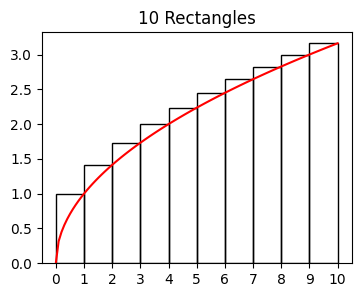

In [25]:
f = lambda x: np.sqrt(x)
x = np.linspace(0, 10, 100)
plot_area_under_curve(x, f, dx=1.0)

If you stare at the plot you can see our area estimate is okay but not great. The rectangles are *overestimating* the area under the curve since they all have segments of area lying above the curve.

The problem was that the rectangles we used were too coarse. It's better to use narrower rectangles, and more of them. What we need to do is make $dx$ smaller by making $N$ bigger. Let's try using $N=50$ rectangles of width $dx=0.2$ instead and see how much the result improves.

Approximate Area: 21.380011968222313


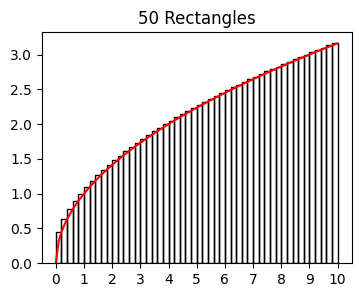

In [26]:
plot_area_under_curve(x, f, dx=0.2)

It looks better. We're at $21.380$ now. If you zoom in you'll see we're still overestimating the true area, but not by near as much as before. As we make $dx$ smaller and smaller, and $N$ bigger and bigger, this estimate will get better and better. The exact area under this curve turns out to be 

$$A = \frac{20}{3}\sqrt{10} \approx 21.082.$$

Let's try to calculate these areas using smaller and smaller rectangles and see how close we can get to the exact answer. To do this, I'll use a loop to calculate the area for successively smaller values of $dx$.

In [27]:
f = lambda x: np.sqrt(x)

for dx in [1, 0.1, 0.01, 0.001, 0.0001]:
    N = int(10 / dx)
    xs = np.cumsum(dx * np.ones(N))
    area = np.sum([f(x)*dx for x in xs])
    print(f'N = {N:6d} \t dx = {dx:8.4f} \t A = {area:4f}')

N =     10 	 dx =   1.0000 	 A = 22.468278
N =    100 	 dx =   0.1000 	 A = 21.233523
N =   1000 	 dx =   0.0100 	 A = 21.097456
N =  10000 	 dx =   0.0010 	 A = 21.083426
N = 100000 	 dx =   0.0001 	 A = 21.082009


It looks like if we want to get the correct answer $21.082$ to 3 decimal places we'd need to use $N=100000$ rectangles of width $dx=10^{-4}$. In practice that's an awful lot of terms to sum up. There are better ways to actually calculate these things numerically than just using the above definition (e.g. [Simpson's Rule](https://en.wikipedia.org/wiki/Simpson%27s_rule)), but I won't go into those.

Let's generalize this. Suppose we want to calculate the area under the curve of some function $y=f(x)$ between two points $x=a$ and $x=b$. We can do this by taking $N$ rectangles each of width $dx=\frac{b-a}{N}$ and height $f(x)dx$ and summing up their areas. If $x_1,x_2,\cdots,x_N$ are the points we're evaluating the heights at, then
$$A \approx f(x_1)dx + f(x_2)dx + f(x_3)dx + \cdots + f(x_N)dx = \sum_{n=1}^{N} f(x_n) dx.$$

To get the exact area, let's allow $N$ to get infinitely large, which also means $dx$ will become infinitesimal. When we do this, it's conventional to use a different symbol for the sum, the long-S symbol $\int$. Instead of writing

$$A = \sum_{n=1}^{N} f(x_n) dx,$$

we'd write
$$A = \int_a^{b} f(x) dx.$$

Read this as "the integral from 0 to 10 of $f(x)dx$". It's called the **definite integral** of the function. In our example, this would be

$$A = \int_0^{10} \sqrt{x} dx.$$

Of course, this fancy notation doesn't actually tell us anything new. We're still just summing up the areas of a bunch of rectangles.

### Integration Rules

It's not at all clear from this definition how we'd get the *exact* answer $A=\frac{20}{3}\sqrt{10}$ shown above. We can get to it approximately by summing rectangle areas, but if we want to get the exact value we'll need a few integral rules.

Before doing so I need to talk about the **indefinite integral**, sometimes called the antiderivative. If $f(x)$ is some function, then its indefinite integral is some other function $F(x)$ whose derivative is $f(x)$,
$$f(x) = \frac{d}{dx} F(x).$$

Typically the indefinite integral is written as an integral, but without limits of integration shown,

$$F(x) = \int f(x) dx.$$

To evaluate a typical *definite* integral like $\int_a^b f(x) dx$ the rule is
$$\int_a^b f(x) dx = F(b) - F(a).$$

That is, we first calculate the indefinite integral $F(x)$, then evaluate it at the points $a$ and $b$, then subtract their difference to get the definite integral, which itself is just the area under the curve of $f(x)$.

With this out of the way, here are some common indefinite integrals:
<table width="20%">
  <tr>
    <th style="text-align: center">Common Integrals</th>
  </tr>
  <tr>
    <td style="text-align: left">$\int 1 dx = x$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\int x dx = \frac{1}{2}x^2$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\int x^2 dx = \frac{1}{3}x^3$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\int \sqrt{x} dx = \frac{2}{3} x^{3/2}$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\int \frac{1}{x} dx = \log{x}$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\int e^x dx = e^x$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\int \log{x} dx = x \log{x} - x$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\int \sin{x} dx = -\cos{x}$</td>
  </tr>
  <tr>
    <td style="text-align: left">$\int \cos{x} dx = \sin{x}$</td>
  </tr>
</table>

Here are some more general integral rules for indefinite integrals:
<table width="100%">
  <tr>
    <th style="width: 20ch; text-align: left">Name</th>
    <th style="width: 50ch; text-align: left">Rule</th>
    <th style="width: 50ch; text-align: left">Example</th>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Power Rule</td>
    <td style="width: 50ch; text-align: left;">$\int x^n dx = \frac{1}{n+1}x^{n+1}$ for any $n \neq -1$</td>
    <td style="width: 50ch; text-align: left;">$\int x^{-2} dx = \frac{1}{-2+1}x^{-2+1} = -\frac{1}{x}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Addition Rule</td>
    <td style="width: 50ch; text-align: left;">$\int (u + v) dx = \int u dx + \int v dx$</td>
    <td style="width: 50ch; text-align: left;">$\int (1 + e^x) dx = \int 1 dx + \int e^x dx = x + e^x$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Constant Rule</td>
    <td style="width: 50ch; text-align: left;">$\int cf(x) dx = c \int f(x) dx$</td>
    <td style="width: 50ch; text-align: left;">$\int 5 \cos{x} dx = 5 \int \cos{x} dx = 5 \sin{x}$</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Integration By Parts</td>
    <td style="width: 50ch; text-align: left;">$\int u dv = uv - \int v du$</td>
    <td style="width: 50ch; text-align: left;">$\int x e^x dx = \int x d(e^x) = x e^x - \int e^x dx = x e^x - e^x $</td>
  </tr>
  <tr>
    <td style="width: 20ch; text-align: left;">Change of Variables</td>
    <td style="width: 50ch; text-align: left;">$\int f(u) du = \int f(g(x)) \frac{du}{dx} dx$</td>
    <td style="width: 50ch; text-align: left;">$\int x e^{x^2} dx = \int e^{x^2} d\big(\frac{1}{2}x^2\big) = \frac{1}{2} \int e^u du = \frac{1}{2} e^u = \frac{1}{2} e^{x^2}$</td>
  </tr>
</table>

Note $d(f(x))$ is just the differential form of the derivative $\frac{d}{dx}f(x)$, so $d(f(x)) = \frac{d}{dx}f(x) dx$.

It's worth mentioning that integral rules are often much harder to apply than derivative rules. In fact, it's not even possible to symbolically integrate every function. The Gaussian function $y=e^{-x^2}$ is a well-known example of a function that can't be integrated symbolically. Of course, we can *always* calculate the *definite* integral numerically, even if we can't symbolically.

Just as with derivatives, you can ask WolframAlpha to evaluate integrals for you. Below I'll calculate the area under the curve problem we did above,

$$A = \int_0^{10} \sqrt{x} dx = \frac{20}{3} \sqrt{10}.$$

In [28]:
query_wolfram_alpha('integral sqrt(x) dx from 0 to 10')

['integral_0^10 sqrt(x)dx = (20 sqrt(10))/3≈21.082']

### Higher-Dimensional Integrals

I'll end this optional section by *briefly* mentioning that we can also take integrals of multivariate functions like $z=f(x,y)$. Geometrically these integrals translate into calculating the *volume* under the surface $z=f(x,y)$.

The idea here is to approximate the volume $V$ under a surface not with $N$ *rectangles* of width $dx$ and height $f(x)$, but instead with $N \cdot M$ *rectangular prisms* of base area $dA = dx \cdot dy$ and height $z=f(x,y)$,

$$V = \int_R f(x,y) dA = \sum_{n=1}^N \sum_{m=1}^M f(x_n,y_m) dxdy.$$

Rather than integrate from one endpoint $a$ to another endpoint $b$, we now have to integrate over a 2D region in the xy-plane that I'll call $R$. That region could be a rectangle in the plane like $[a,b] \times [c,d]$, in which case we'd have

$$V = \int_a^b \int_c^d f(x,y) dxdy.$$

But usually $R$ won't be a rectangle, but some arbitrary shape. It could even be infinite in one or more directions.

The same idea extends to $n$ dimensional functions $z=f(x_1,\cdots,x_n)$. In this case we're calculating the $n$ dimensional *hypervolume* $V_n$ under the $n-1$ dimensional *manifold* $z=f(x_1,\cdots,x_n)$. The hyperrectangles would now have base hyperarea $dA_{n-1} = dx_1dx_2\cdots dx_n$ and height $z=f(x_1,\cdots,x_n)$, so

$$V_n = \int_{R_{n-1}} f(x_1,\cdots,x_n) dA_{n-1} = \sum_{\text{all hyperrectangles}} f(x_1,\cdots,x_n) dx_1dx_2\cdots dx_n.$$

If you don't understand what's going on here, that's fine. When you see multivariate integrals come up in future lessons, just think of them as calculating volumes under surfaces using infinitely thin rectangular prisms. That's the most important thing to take away.